[Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -d

Sebastian Raschka 12/29/2015 

CPython 3.5.1
IPython 4.0.1


In [2]:
# to install watermark just uncomment the following line:
#%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

# Bonus Material - Reading MNIST into NumPy arrays

Here, I provide some instructions for reading in the MNIST dataset of handwritten digits into NumPy arrays.
The dataset consists of the following files:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 samples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels) 
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 samples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels) 

Dataset source: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)
    

After downloading the files, I recommend to unzip the files using the Unix/Linux gzip tool from the terminal for efficiency, e.g., using the command  
    `gzip *ubyte.gz -d`   
in your local MNIST download directory.

Next, we define a simple function to read in the training or test images and corresponding labels.

In [3]:
import os
import struct
import numpy as np
 
def load_mnist(path, which='train'):
 
    if which == 'train':
        labels_path = os.path.join(path, 'train-labels-idx1-ubyte')
        images_path = os.path.join(path, 'train-images-idx3-ubyte')
    elif which == 'test':
        labels_path = os.path.join(path, 't10k-labels-idx1-ubyte')
        images_path = os.path.join(path, 't10k-images-idx3-ubyte')
    else:
        raise AttributeError('`which` must be "train" or "test"')
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, n, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

The returned `images` NumPy array will have the shape $n \times m$, where $n$ is the number of samples, and $m$ is the number of features. The images in the MNIST dataset consist of $28 \times 28$ pixels, and each pixel is represented by a grayscale intensity value. Here, we unroll the $28 \times 28$ images into 1D row vectors, which represent the rows in our matrix; thus $m=784$.



You may wonder why we read in the labels in such a strange way:

    magic, n = struct.unpack('>II', lbpath.read(8))
    labels = np.fromfile(lbpath, dtype=np.int8)

This is to accomodate the way the labels where stored, which is described in the excerpt from the MNIST website:

<pre>[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000801(2049) magic number (MSB first) 
0004     32 bit integer  60000            number of items 
0008     unsigned byte   ??               label 
0009     unsigned byte   ??               label 
........ 
xxxx     unsigned byte   ??               label</pre>

So, we first read in the "magic number" (describes a file format or protocol) and the "number of items" from the file buffer before we read the following bytes into a NumPy array using the `fromfile` method.

The `fmt` parameter value `'>II'` that we passed as an argument to `struct.unpack` can be composed into:

- '>': big-endian (defines the order in which a sequence of bytes is stored)
- 'I': unsigned int

If everything executed correctly, we should now have a label vector of $60,000$ instances, and a $60,000 \times 784$ image feature matrix.

In [5]:
X, y = load_mnist(path='/Users/Sebastian/Desktop/', which='train')
print('Labels: %d' % y.shape[0])
print('Rows: %d, columns: %d' % (X.shape[0], X.shape[1]))

Labels: 60000
Rows: 60000, columns: 784


To check if the pixels were retrieved correctly, let us print a few images:

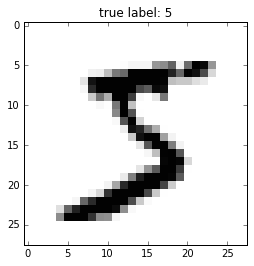

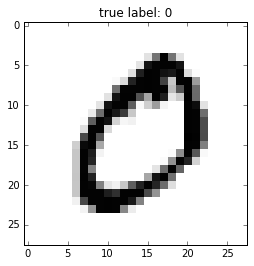

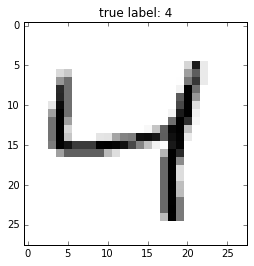

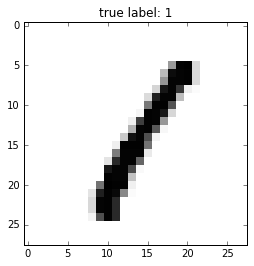

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

for i in range(4):
    plot_digit(X, y, i)

Lastly, we can save the NumPy arrays as CSV files for more convenient retrievel, however, I wouldn't recommend storing the 60,000 samples as CSV files due to the enormous file size.

In [5]:
np.savetxt('train_img.csv', X[:3000, :], delimiter=',', fmt='%i')
np.savetxt('train_labels.csv', y[:3000], delimiter=',', fmt='%i')

In [6]:
X = np.genfromtxt('train_img.csv', delimiter=',', dtype=int)
y = np.genfromtxt('train_labels.csv', delimiter=',', dtype=int)